# Data analysis of LTE-M

In this document I will perform some data analysis on the above mentioned technologies.


## Imports and utilities

In [114]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from utils import *

def get_stats(df):
    duration = df.index[-1] - df.index[0]
    mean_current = df.Current.mean()
    energy_spent = mean_current * duration
    return mean_current, duration, energy_spent

## LTE cold start into PSM

In [115]:
data_set = "ppk_measurements/lte_cold_start.csv"
df = import_ppk(data_set, digital_io=[0])
df = df.rename(columns={"Current(uA)": "Current"})
df.Current = df.Current /1000

/home/oskar/.venvp3/jupyter/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Attach:

Mean power usage 27.213937397277032 mA
Event duration 7696.0 ms
Energy spent 209.43846220944403 mC



<IPython.core.display.Javascript object>


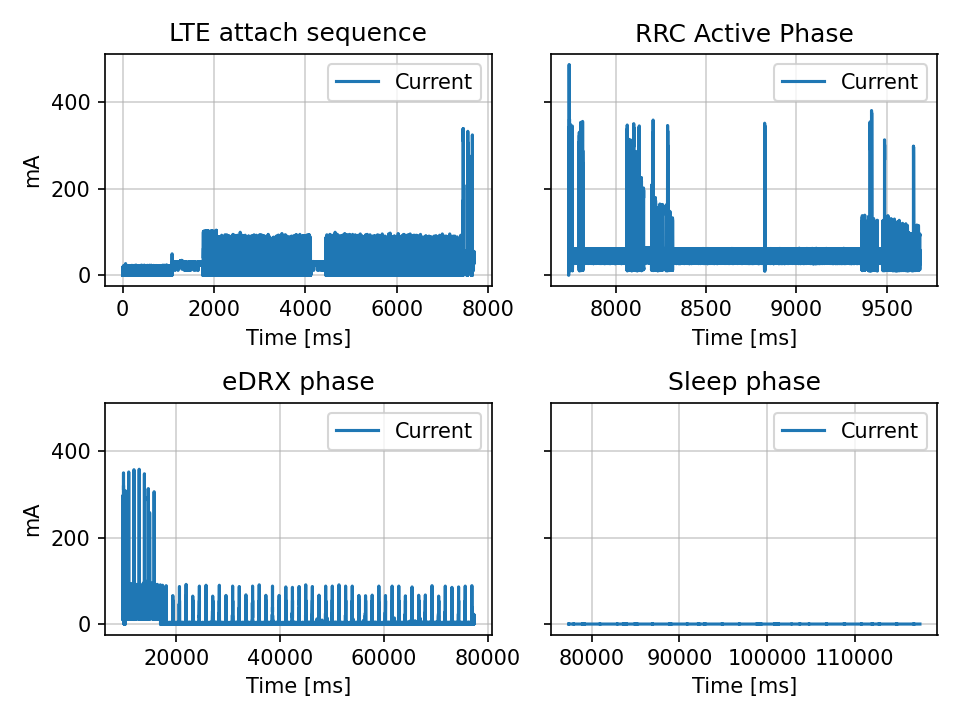

RRC Active:

Mean power usage 41.23201165402193 mA
Event duration 1942.8999999999996 ms
Energy spent 80.1096754425992 mC

eDRX:

Mean power usage 4.42724592732145 mA
Event duration 67677.29000000001 ms
Energy spent 299.6240065246527 mC

Sleep:

Mean power usage 4.08143919284701 uA
Event duration 40.09890999999999 s
Energy spent 163.66126286444486 uC

Total:

Mean power usage 7.635603500022104 mA
Event duration 77.36 s
Energy spent 590.6902867617099 mC


In [119]:
attach_sequence = df[:7696]

mean_current_ma, duration_ms, energy_spent_uc = get_stats(attach_sequence)
print("Attach:\n")
print(f"Mean power usage {mean_current_ma} mA")
print(f"Event duration {duration_ms} ms")
print(f"Energy spent {energy_spent_uc / 1000} mC")
print()

fig, ax = plt.subplots(2,2, sharey=True)
fig.dpi = 150

attach_sequence.plot(ax=ax[0,0], y="Current", ylabel="mA", xlabel="Time [ms]", title="LTE attach sequence")


rcc_active = df[df["D0"] == False]

mean_current_ma, duration_ms, energy_spent_uc = get_stats(rcc_active)

print("RRC Active:\n")
print(f"Mean power usage {mean_current_ma} mA")
print(f"Event duration {duration_ms} ms")
print(f"Energy spent {energy_spent_uc / 1000} mC")
print()


rcc_active.plot(ax=ax[0,1], y="Current",title="RRC Active Phase", xlabel="Time [ms]", ylabel="mA")


edrx = df[rcc_active.index[-1]:77360]
mean_current_ma, duration_ms, energy_spent_uc = get_stats(edrx)

print("eDRX:\n")
print(f"Mean power usage {mean_current_ma} mA")
print(f"Event duration {duration_ms} ms")
print(f"Energy spent {energy_spent_uc / 1000} mC")
print()


edrx.plot(ax=ax[1,0], y="Current", title="eDRX phase", xlabel="Time [ms]", ylabel="mA")


sleep = df[edrx.index[-1]:]

mean_current_ma, duration_ms, energy_spent_uc = get_stats(sleep)
print("Sleep:\n")
print(f"Mean power usage {mean_current_ma * 1000} uA")
print(f"Event duration {duration_ms/1000} s")
print(f"Energy spent {energy_spent_uc} uC")
print()


sleep.plot(ax=ax[1,1], y="Current", title="Sleep phase", xlabel="Time [ms]", ylabel="mA")
for a in ax.flatten():
    a.grid(alpha=.6)
    
plt.tight_layout()
plt.show()
save_plot("lte_attach_sequence.png")

total_event = df[attach_sequence.index[0]:edrx.index[-1]]
mean_current_ma, duration_ms, energy_spent_uc = get_stats(total_event)
print("Total:\n")
print(f"Mean power usage {mean_current_ma} mA")
print(f"Event duration {duration_ms/1000} s")
print(f"Energy spent {energy_spent_uc/1000} mC")

# CoAP transmission from PSM

## For 210 bytes

In [120]:
data_set = "ppk_measurements/lte_coap_210_bytes_from_psm_back_to_psm.csv"
df = import_ppk(data_set, digital_io=[0])
df.rename(columns={"Current(uA)": "Current"}, inplace=True)
df.Current = df.Current / 1000
coap = df[2207:4254]
edrx = df[coap.index[-1]:68666]
mean_current_ma, duration_ms, energy_spent_uc = get_stats(coap)
print("210 bytes of CoAP transmission:\n")
print(f"Mean power usage {mean_current_ma} mA")
print(f"Event duration {duration_ms/1000} s")
print(f"Energy spent {energy_spent_uc} uC")
mean_current_ma, duration_ms, energy_spent_uc = get_stats(edrx)
print("eDRX:\n")
print(f"Mean power usage {mean_current_ma} mA")
print(f"Event duration {duration_ms/1000} s")
print(f"Energy spent {energy_spent_uc} uC")
mean_current_ma, duration_ms, energy_spent_uc = get_stats(df[coap.index[0]:edrx.index[-1]])
print("Total:\n")
print(f"Mean power usage {mean_current_ma} mA")
print(f"Event duration {duration_ms/1000} s")
print(f"Energy spent {energy_spent_uc/1000} mC")

/home/oskar/.venvp3/jupyter/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


210 bytes of CoAP transmission:

Mean power usage 23.358857781605213 mA
Event duration 2.0469999999999997 s
Energy spent 47815.58187894586 uC
eDRX:

Mean power usage 1.5457213760186717 mA
Event duration 64.412 s
Energy spent 99563.00527211468 uC
Total:

Mean power usage 2.217588519147108 mA
Event duration 66.459 s
Energy spent 147.37871539399768 mC


<IPython.core.display.Javascript object>


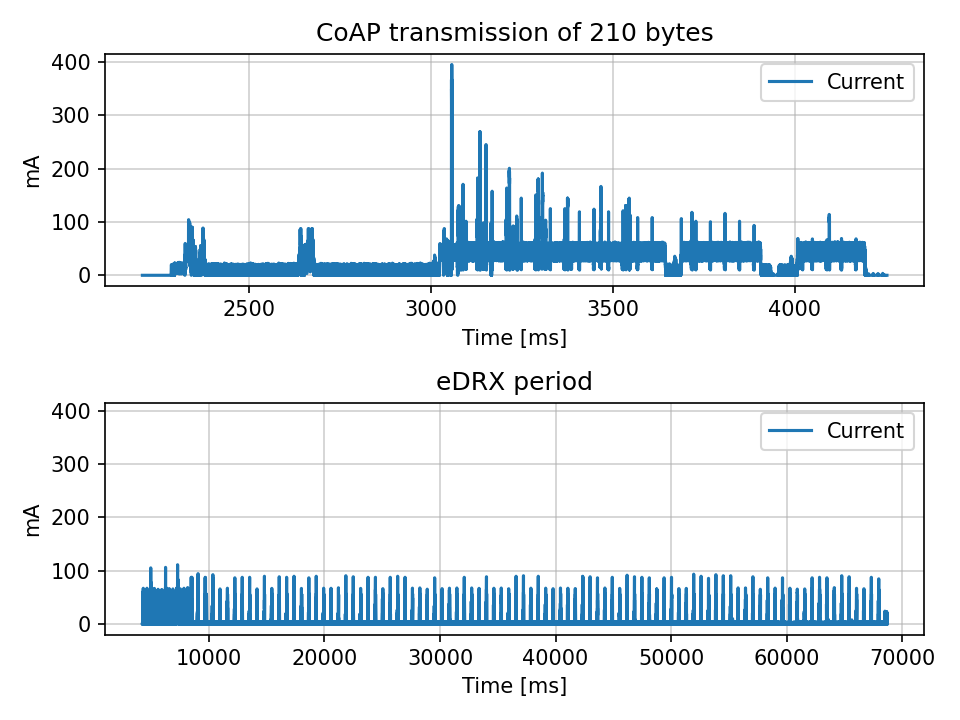

In [99]:

fig, ax = plt.subplots(2,1, sharey=True)
fig.dpi = 150


coap.plot(ax=ax[0], y="Current", ylabel="mA", xlabel="Time [ms]", title="CoAP transmission of 210 bytes")
edrx.plot(ax=ax[1], y="Current", ylabel="mA", xlabel="Time [ms]", title="eDRX period")

for a in ax:
    a.grid(alpha=.6)

plt.tight_layout()
plt.show()
save_plot("lte_coap_210_bytes_coap_transmission.png")

## For 21 bytes

In [121]:
data_set = "ppk_measurements/lte_coap_21_bytes_from_psm_back_to_psm.csv"
df = import_ppk(data_set, digital_io=[0])
df.rename(columns={"Current(uA)": "Current"}, inplace=True)
df.Current = df.Current / 1000

21 bytes of CoAP transmission:

Mean power usage 24.364307649934297 mA
Event duration 1.925 s
Energy spent 46901.29222612352 uC
eDRX:

Mean power usage 1.5306808128543954 mA
Event duration 64.67477 s
Energy spent 98996.42951477105 uC
Total:

Mean power usage 2.190670171448884 mA
Event duration 66.59976999999999 s
Energy spent 145898.1295643562 uC


<IPython.core.display.Javascript object>


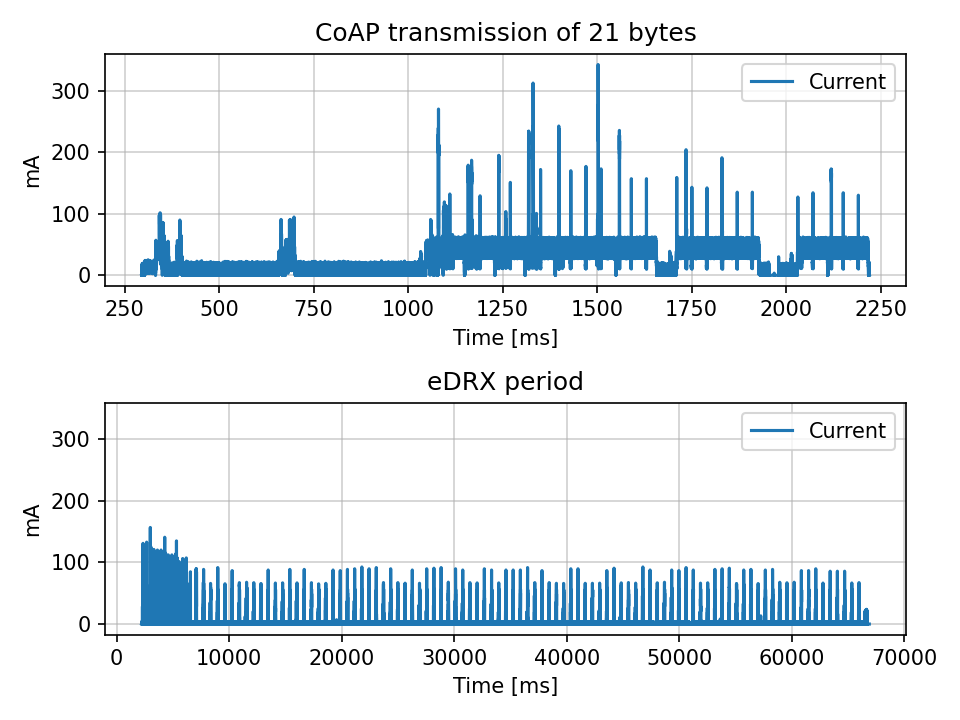

In [123]:
coap = df[295:2220]
edrx = df[coap.index[-1]:68666]
mean_current_ma, duration_ms, energy_spent_uc = get_stats(coap)
print("21 bytes of CoAP transmission:\n")
print(f"Mean power usage {mean_current_ma} mA")
print(f"Event duration {duration_ms/1000} s")
print(f"Energy spent {energy_spent_uc} uC")
mean_current_ma, duration_ms, energy_spent_uc = get_stats(edrx)
print("eDRX:\n")
print(f"Mean power usage {mean_current_ma} mA")
print(f"Event duration {duration_ms/1000} s")
print(f"Energy spent {energy_spent_uc} uC")
mean_current_ma, duration_ms, energy_spent_uc = get_stats(df[coap.index[0]:edrx.index[-1]])
print("Total:\n")
print(f"Mean power usage {mean_current_ma} mA")
print(f"Event duration {duration_ms/1000} s")
print(f"Energy spent {energy_spent_uc/1000} mC")

fig, ax = plt.subplots(2,1, sharey=True)
fig.dpi = 150


coap.plot(ax=ax[0], y="Current", ylabel="mA", xlabel="Time [ms]", title="CoAP transmission of 21 bytes")
edrx.plot(ax=ax[1], y="Current", ylabel="mA", xlabel="Time [ms]", title="eDRX period")

for a in ax:
    a.grid(alpha=.6)

plt.tight_layout()
plt.show()
save_plot("lte_coap_21_bytes_transmission.png")

## LTE PSM sleep current

In [107]:
data_set = "ppk_measurements/lte_psm_idle.csv"
df = import_ppk(data_set)
df.rename(columns={"Current(uA)": "Current"}, inplace=True)


In [109]:
mean_current_ua, duration_ms, energy_spent_pc = get_stats(df)
print("LTE PSM Sleep:\n")
print(f"Mean power usage {mean_current_ma} uA")
print(f"Event duration {duration_ms/1000} s")
print(f"Energy spent {energy_spent_pc/1000} uC")

LTE PSM Sleep:

Mean power usage 2.190670171448884 uA
Event duration 46.98922 s
Energy spent 53.274883429454874 uC


## Idle 4G with CoAP every 30 seconds, nRF9160

Mean power usage 0.13897727741697455 mW
Mean current usage 42.11432648999229 uA


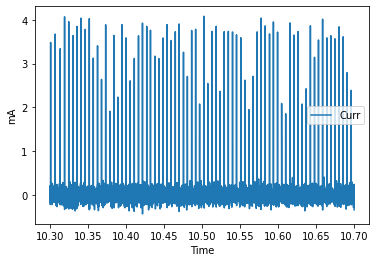

In [157]:
data_set = "coap3.csv"
df = import_dlog(data_set)
df = df.loc[10.3:10.7]
watt_average = 3.3 * df["Curr"].mean()
print(f"Mean power usage {watt_average * 1000} mW")
print(f"Mean current usage {df['Curr'].mean() * 1000 * 1000} uA")
df["Curr"] = 1000*df["Curr"]
df.plot(y="Curr", ylabel="mA")
plt.show()

## Cold start LTE with CoAP transmission

Mean power usage 82.31047251100735 mW
Mean current usage 24.94256742757798 mA


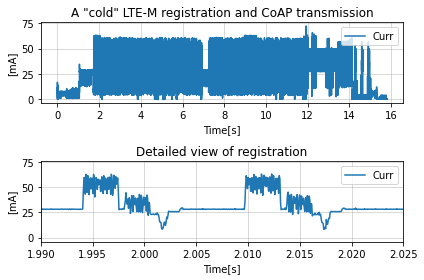

In [54]:
data_set = "lte_coap_cold_start.csv"
df = import_dlog(data_set)
start, stop = 0, 15.8
df = df.loc[start:stop]
watt_average = 3.3 * df["Curr"].mean()
print(f"Mean power usage {watt_average * 1000} mW")
print(f"Mean current usage {df['Curr'].mean() * 1000} mA")
df["Curr"] = 1000*df["Curr"]


fig, ax = plt.subplots(2, sharey=True)

df.plot(ax=ax[0], y="Curr", ylabel="[mA]", xlabel="Time[s]")
ax[0].set_title("A \"cold\" LTE-M registration and CoAP transmission")


df.plot(ax=ax[1], y="Curr", ylabel="[mA]", xlabel="Time[s]", xlim=(1.99,2.025))
ax[1].set_title("Detailed view of registration")

for a in ax:
    a.grid(alpha=0.6)
fig.tight_layout()
save_plot("cold_lte_registration.png")
plt.show()

## LTE with PSM

In [127]:
data_set = "coap_from_psm_60s_active_time.csv"

df = import_dlog(data_set)
start, stop = 0, 30
df = df[df["Curr"] < 100]
df = df.loc[start:stop]
watt_average = 3.3 * df["Curr"].mean()
print(f"Mean power usage {watt_average * 1000} mW")
print(f"Mean current usage {df['Curr'].mean() * 1000} mA")

df["Curr"] = 1000*df["Curr"]

Mean power usage 10.116858017894415 mW
Mean current usage 3.0657145508770953 mA


<IPython.core.display.Javascript object>


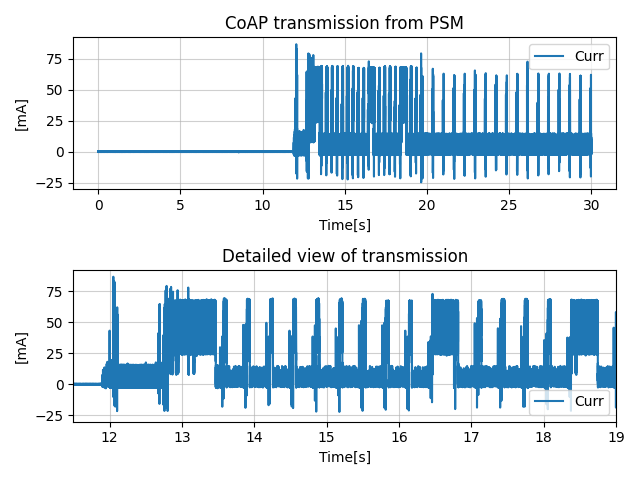

Mean sleep current: -0.00015727186818663882


<IPython.core.display.Javascript object>


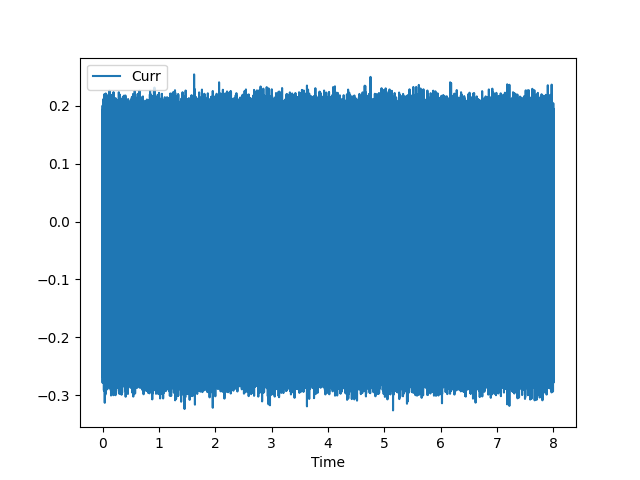

In [130]:
fig, ax = plt.subplots(2, sharey=True)

df.plot(ax=ax[0], y="Curr", ylabel="[mA]", xlabel="Time[s]")
ax[0].set_title("CoAP transmission from PSM")

df.plot(ax=ax[1], y="Curr", ylabel="[mA]", xlabel="Time[s]", xlim=(11.5, 19))
ax[1].set_title("Detailed view of transmission")

for a in ax:
    a.grid(alpha=0.6)
plt.tight_layout()
plt.show()

sleep = df[0:8]
print(f"Mean sleep current: {sleep['Curr'].mean()}")
sleep.plot(y="Curr")
plt.show()

Mean power usage 31.597413643163687 mW
Mean current usage 9.574973831261723 mA


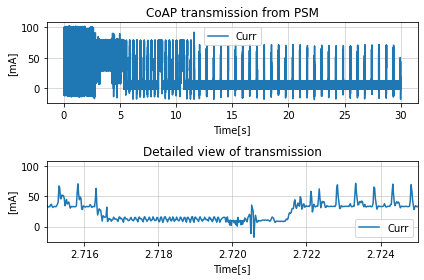

In [22]:
data_set = "coap_from_psm_60s_active_time_21B_pl.csv"

df = import_dlog(data_set)
start, stop = 0, 30
df = df[df["Curr"] < 100]
df = df.loc[start:stop]
watt_average = 3.3 * df["Curr"].mean()
print(f"Mean power usage {watt_average * 1000} mW")
print(f"Mean current usage {df['Curr'].mean() * 1000} mA")

df["Curr"] = 1000*df["Curr"]


fig, ax = plt.subplots(2, sharey=True)

df.plot(ax=ax[0], y="Curr", ylabel="[mA]", xlabel="Time[s]")
ax[0].set_title("CoAP transmission from PSM")

df.plot(ax=ax[1], y="Curr", ylabel="[mA]", xlabel="Time[s]", xlim=(2.715, 2.725))
ax[1].set_title("Detailed view of transmission")

for a in ax:
    a.grid(alpha=0.6)
plt.tight_layout()
plt.show()

Mean power usage 9.652318963941822 mW
Mean current usage 2.9249451405884312 mA


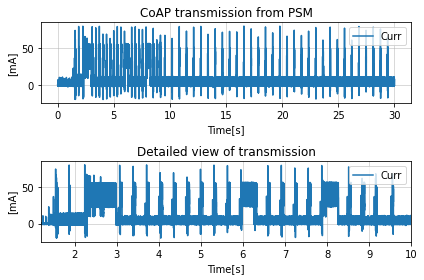

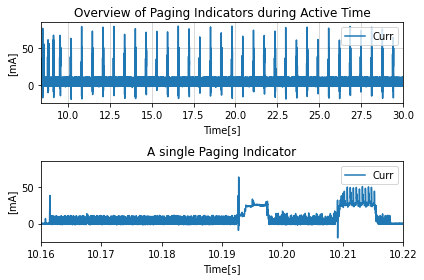

In [13]:
data_set = "coap_from_psm_60s_active_time_210B_pl.csv"

df = import_dlog(data_set)
start, stop = 0, 30
df = df.loc[start:stop]
watt_average = 3.3 * df["Curr"].mean()
print(f"Mean power usage {watt_average * 1000} mW")
print(f"Mean current usage {df['Curr'].mean() * 1000} mA")

df["Curr"] = 1000*df["Curr"]


fig, ax = plt.subplots(2, sharey=True)

df.plot(ax=ax[0], y="Curr", ylabel="[mA]", xlabel="Time[s]")
ax[0].set_title("CoAP transmission from PSM")

df.plot(ax=ax[1], y="Curr", ylabel="[mA]", xlabel="Time[s]", xlim=(2, 9))
ax[1].set_title("Detailed view of transmission")

for a in ax:
    a.grid(alpha=0.6)
plt.tight_layout()
plt.show()

fig, (ax1, ax2) = plt.subplots(2, sharey=True)
df.plot(ax=ax1, y="Curr", ylabel="[mA]", xlabel="Time[s]", xlim=(8.4, 30))
ax1.grid(alpha=0.6)
ax1.set_title("Overview of Paging Indicators during Active Time")


df.plot(ax=ax2, y="Curr", ylabel="[mA]", xlabel="Time[s]", xlim=(10.160, 10.22))
ax2.set_title("A single Paging Indicator")

plt.tight_layout()
plt.show()

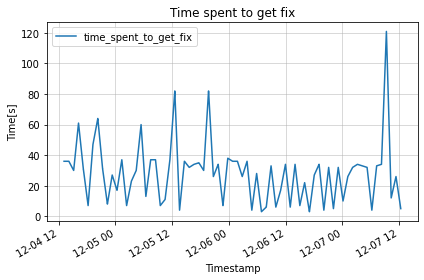

In [5]:
df = pd.read_csv("time_spent_to_get_fix.csv", index_col=0, parse_dates=True)
df.plot(ylabel="Time[s]", xlabel="Timestamp", title="Time spent to get fix")

plt.grid(alpha=0.6)
plt.tight_layout()

save_plot("gps_tsof.png")
plt.show()

/home/oskar/.venvp3/jupyter/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


117187.5


<IPython.core.display.Javascript object>


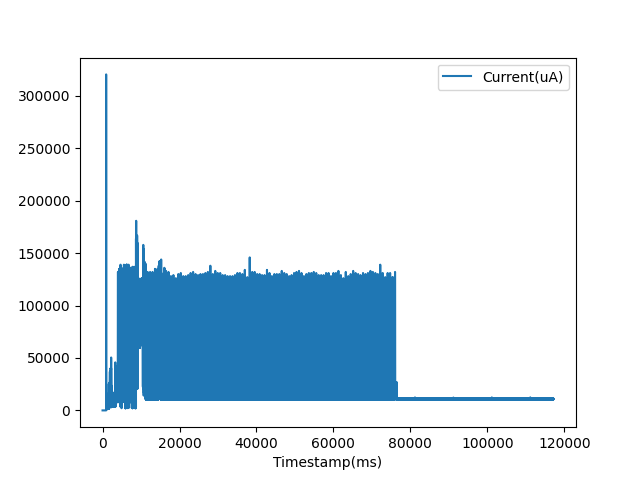

<AxesSubplot:xlabel='Timestamp(ms)'>

In [20]:
data_set = "lte_cold_start.csv"
df = pd.read_csv(data_set, index_col=0)
print(df.index[-1] - df.index[0])
df.plot(y="Current(uA)")